In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Medeu district.csv')
df

,Year,Population,District Population,Migration,Birth,Death
0,2000,1 130 439,130 776,NaN,NaN,NaN
1,2001,1 128 759,129 580,NaN,NaN,NaN
2,2002,1 132 424,128 867,NaN,NaN,NaN
3,2003,1 149 641,129 986,-170.0,"1,377","1,532"
4,2004,1 175 208,131 751,-53.0,"1,480","1,561"
5,2005,1 209 485,134 352,402.0,"3,617","1,742"
6,2006,1 247 896,139 503,155.0,"3,954","1,577"
7,2007,1 287 246,145 358,96.0,"4,182","1,434"
8,2008,1 324 739,151 565,20.0,"5,130","1,427"
9,2009,1 361 877,159 327,-23.0,"2,879","1,350"


In [3]:
df = df.dropna()
df['Population'] = df['Population'].astype(str).str.replace(' ', '').astype(int)
df['District Population'] = df['District Population'].astype(str).str.replace(' ', '').astype(int)
df['Birth'] = df['Birth'].astype(str).str.replace(',', '.').astype(float)
df['Death'] = df['Death'].astype(str).str.replace(',', '.').astype(float)


df

/tmp/ipykernel_6040/3957259955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Population'] = df['Population'].astype(str).str.replace(' ', '').astype(int)
/tmp/ipykernel_6040/3957259955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['District Population'] = df['District Population'].astype(str).str.replace(' ', '').astype(int)
/tmp/ipykernel_6040/3957259955.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

,Year,Population,District Population,Migration,Birth,Death
3,2003,1149641,129986,-170.0,1.377,1.532
4,2004,1175208,131751,-53.0,1.480,1.561
5,2005,1209485,134352,402.0,3.617,1.742
6,2006,1247896,139503,155.0,3.954,1.577
7,2007,1287246,145358,96.0,4.182,1.434
8,2008,1324739,151565,20.0,5.130,1.427
9,2009,1361877,159327,-23.0,2.879,1.350
10,2010,1390610,163069,93.0,3.014,1.447
11,2011,1413152,166965,133.0,3.046,1.306
12,2012,1449366,173026,42.0,2.854,1.351


/tmp/ipykernel_6040/3729065288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')


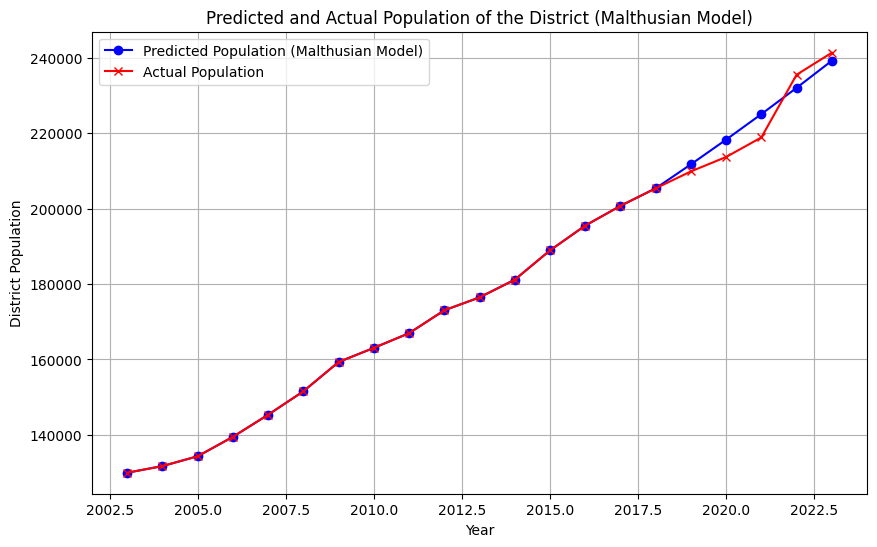

MSE: 15886365.1006006
R2: 0.8960796109560474


In [4]:
from sklearn.metrics import mean_squared_error, r2_score
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)
y_train = df[df.index.year <= 2018]['District Population']
y_test = df[df.index.year > 2018]['District Population']


def malthusian_model(P0, r, t):
    return P0 * np.exp(r * t)


P0 = y_train.iloc[0]
r_values = []

for i in range(1, len(y_train)):
    r = np.log(y_train.iloc[i] / y_train.iloc[i-1])
    r_values.append(r)

r_mean = np.mean(r_values)


years_test = np.arange(2019, 2024) - 2018
predicted_population_malthus = malthusian_model(y_train.iloc[-1], r_mean, years_test)


if len(y_test) == len(predicted_population_malthus):
    
    mse_malthus = mean_squared_error(y_test, predicted_population_malthus)
    r2_malthus = r2_score(y_test, predicted_population_malthus)

    
    years_full = np.arange(2003, 2024)
    population_full_malthus = np.concatenate((y_train.values, predicted_population_malthus))

    plt.figure(figsize=(10, 6))
    plt.plot(years_full, population_full_malthus, marker='o', linestyle='-', color='b', label='Predicted Population (Malthusian Model)')
    plt.plot(df.index.year, df['District Population'], marker='x', linestyle='-', color='r', label='Actual Population')
    plt.xlabel('Year')
    plt.ylabel('District Population')
    plt.title('Predicted and Actual Population of the District (Malthusian Model)')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f'MSE: {mse_malthus}')
    print(f'R2: {r2_malthus}')
else:
    print("Error: The sizes of the predicted and test datasets do not match.")


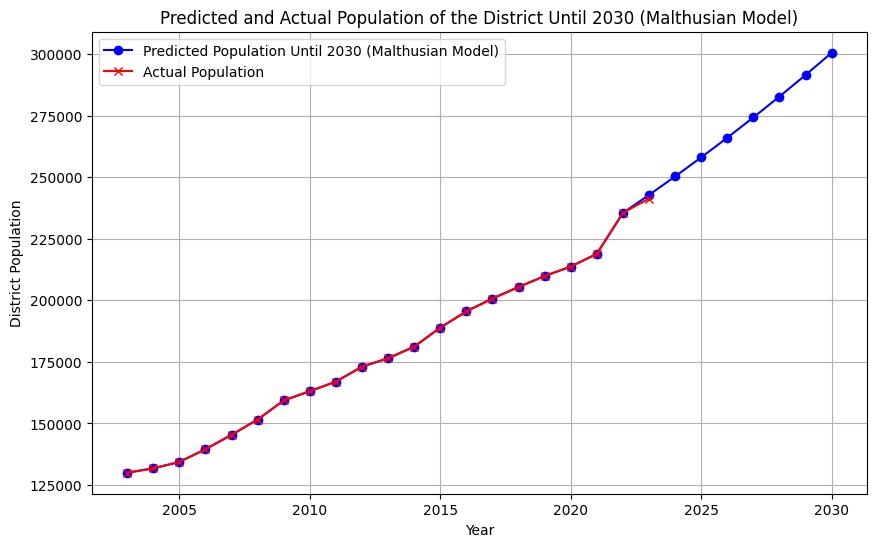

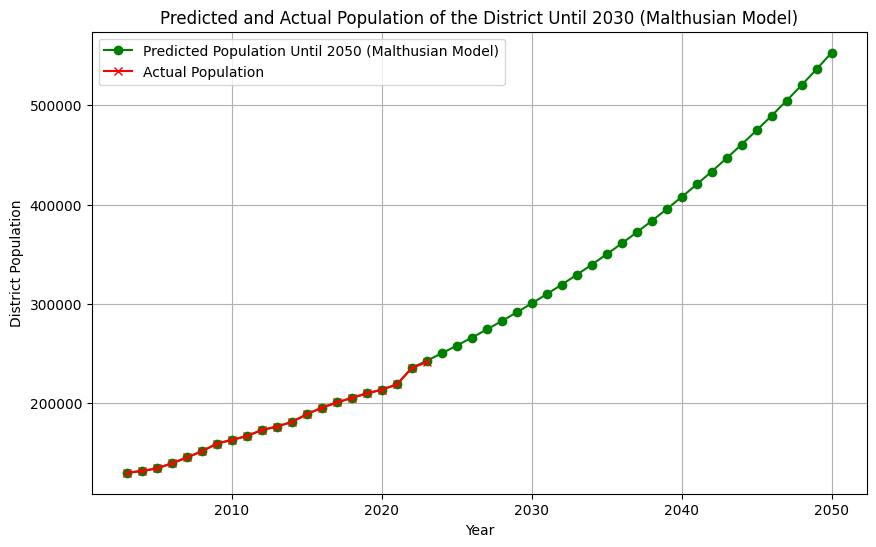

In [5]:
y_train_2030 = df[df.index.year <= 2022]['District Population']
y_test_2030 = df[df.index.year > 2022]['District Population']

years_2030 = np.arange(2023, 2031) - 2022
years_2050 = np.arange(2023, 2051) - 2022

predicted_population_malthus_2030 = malthusian_model(y_train_2030.iloc[-1], r_mean, years_2030)
predicted_population_malthus_2050 = malthusian_model(y_train_2030.iloc[-1], r_mean, years_2050)


years_full_2030 = np.arange(2003, 2031)
years_full_2050 = np.arange(2003, 2051)

population_full_malthus_2030 = np.concatenate((y_train_2030.values, predicted_population_malthus_2030))
population_full_malthus_2050 = np.concatenate((y_train_2030.values, predicted_population_malthus_2050))

# Chart Until 2030
plt.figure(figsize=(10, 6))
plt.plot(years_full_2030, population_full_malthus_2030, marker='o', linestyle='-', color='b', label='Predicted Population Until 2030 (Malthusian Model)')
plt.plot(df.index.year, df['District Population'], marker='x', linestyle='-', color='r', label='Actual Population')
plt.xlabel('Year')
plt.ylabel('District Population')
plt.title('Predicted and Actual Population of the District Until 2030 (Malthusian Model)')
plt.legend()
plt.grid(True)
plt.show()

# Chart Until 2050
plt.figure(figsize=(10, 6))
plt.plot(years_full_2050, population_full_malthus_2050, marker='o', linestyle='-', color='g', label='Predicted Population Until 2050 (Malthusian Model)')
plt.plot(df.index.year, df['District Population'], marker='x', linestyle='-', color='r', label='Actual Population')
plt.xlabel('Year')
plt.ylabel('District Population')
plt.title('Predicted and Actual Population of the District Until 2030 (Malthusian Model)')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
forecast_years_2050 = np.arange(2023, 2051)
forecast_df_2050 = pd.DataFrame({
    'Year': forecast_years_2050,
    'Predicted District Population': predicted_population_malthus_2050
})

print("\nPredicted Population Until 2050 (Malthusian Model):")
print(forecast_df_2050)


Predicted Population Until 2050 (Malthusian Model):
    Year  Predicted District Population
0   2023                  242748.993469
1   2024                  250263.627920
2   2025                  258010.888387
3   2026                  265997.976131
4   2027                  274232.315343
5   2028                  282721.560036
6   2029                  291473.601167
7   2030                  300496.573966
8   2031                  309798.865501
9   2032                  319389.122476
10  2033                  329276.259263
11  2034                  339469.466190
12  2035                  349978.218089
13  2036                  360812.283093
14  2037                  371981.731725
15  2038                  383496.946254
16  2039                  395368.630347
17  2040                  407607.819018
18  2041                  420225.888884
19  2042                  433234.568743
20  2043                  446645.950472
21  2044                  460472.500272
22  2045                  4

In [8]:
last_year = df.index.year[-1]
steps_2024 = 2024 - last_year
steps_2030 = 2030 - last_year
steps_2050 = 2050 - last_year

16:49:46 - cmdstanpy - INFO - Chain [1] start processing
16:49:46 - cmdstanpy - INFO - Chain [1] done processing
/home/agytai/.local/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


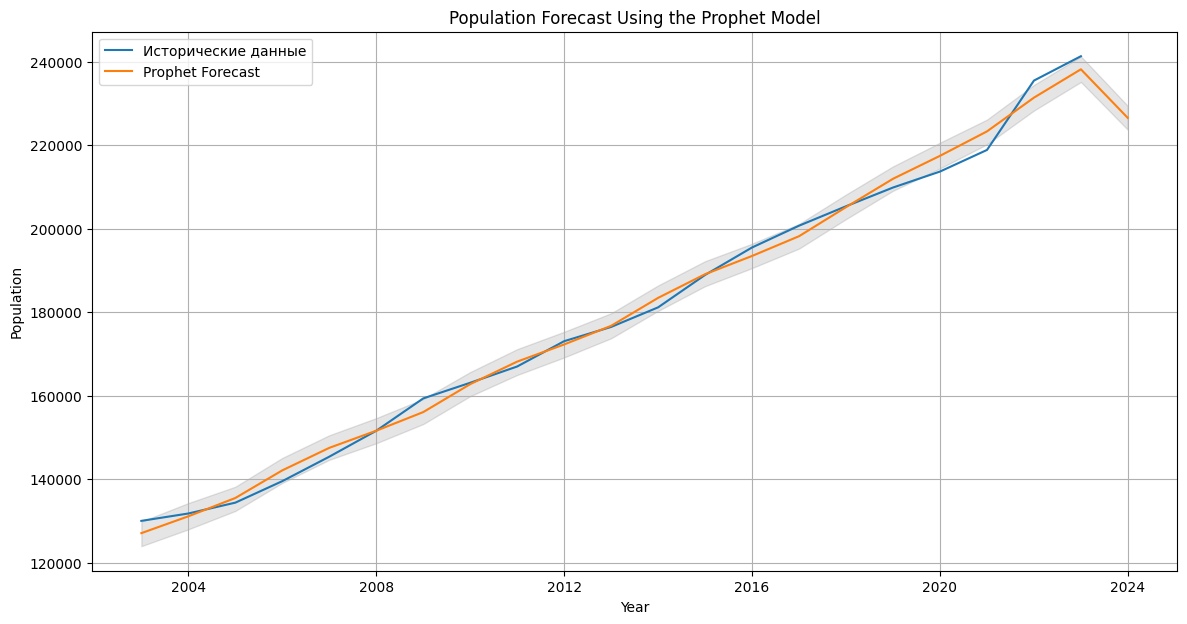

In [9]:
from prophet import Prophet
import matplotlib.pyplot as plt


df_prophet = df.reset_index()
df_prophet = df_prophet.rename(columns={'Year': 'ds', 'District Population': 'y'})


model_prophet = Prophet()
model_prophet.fit(df_prophet)


future = model_prophet.make_future_dataframe(periods=steps_2024, freq='Y')
forecast_prophet = model_prophet.predict(future)


plt.figure(figsize=(14, 7))
plt.plot(df['District Population'], label='Hiatorical Data')
plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label='Prophet Forecast')
plt.fill_between(forecast_prophet['ds'], forecast_prophet['yhat_lower'], forecast_prophet['yhat_upper'], color='k', alpha=0.1)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Forecast Using the Prophet Model')
plt.legend()
plt.grid(True)
plt.show()


16:51:50 - cmdstanpy - INFO - Chain [1] start processing


16:51:50 - cmdstanpy - INFO - Chain [1] done processing
/home/agytai/.local/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


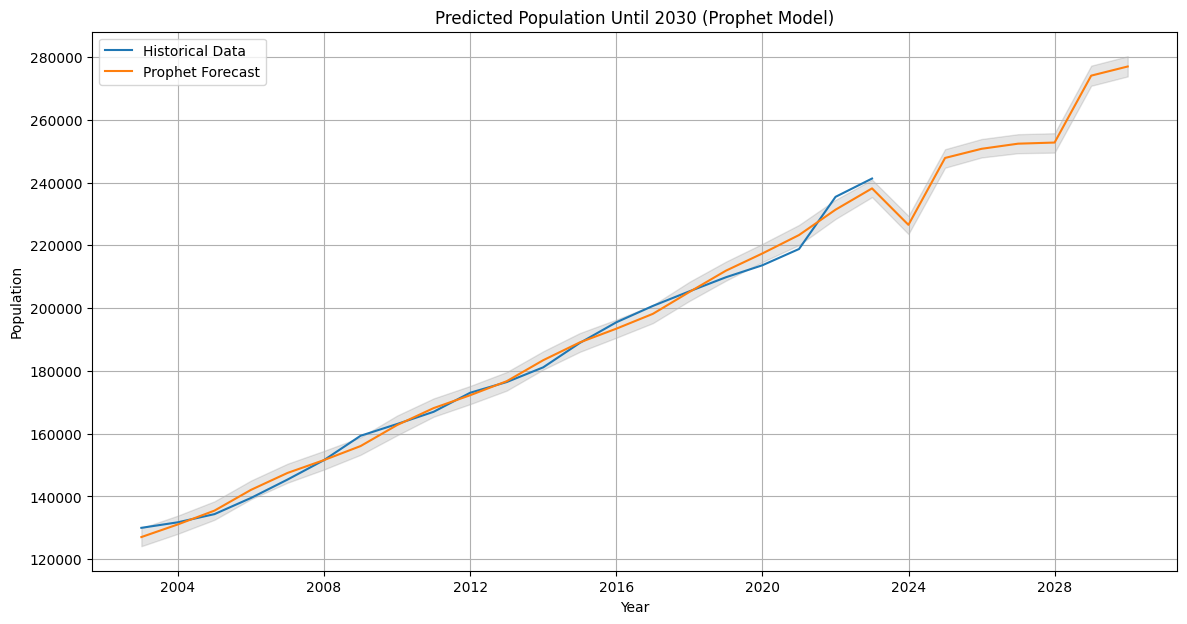

In [10]:
from prophet import Prophet
import matplotlib.pyplot as plt


df_prophet = df.reset_index()
df_prophet = df_prophet.rename(columns={'Year': 'ds', 'District Population': 'y'})


model_prophet = Prophet()
model_prophet.fit(df_prophet)


future = model_prophet.make_future_dataframe(periods=steps_2030, freq='Y')
forecast_prophet = model_prophet.predict(future)


plt.figure(figsize=(14, 7))
plt.plot(df['District Population'], label='Historical Data')
plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label='Prophet Forecast')
plt.fill_between(forecast_prophet['ds'], forecast_prophet['yhat_lower'], forecast_prophet['yhat_upper'], color='k', alpha=0.1)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Predicted Population Until 2030 (Prophet Model)')
plt.legend()
plt.grid(True)
plt.show()


16:52:29 - cmdstanpy - INFO - Chain [1] start processing


16:52:29 - cmdstanpy - INFO - Chain [1] done processing
/home/agytai/.local/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


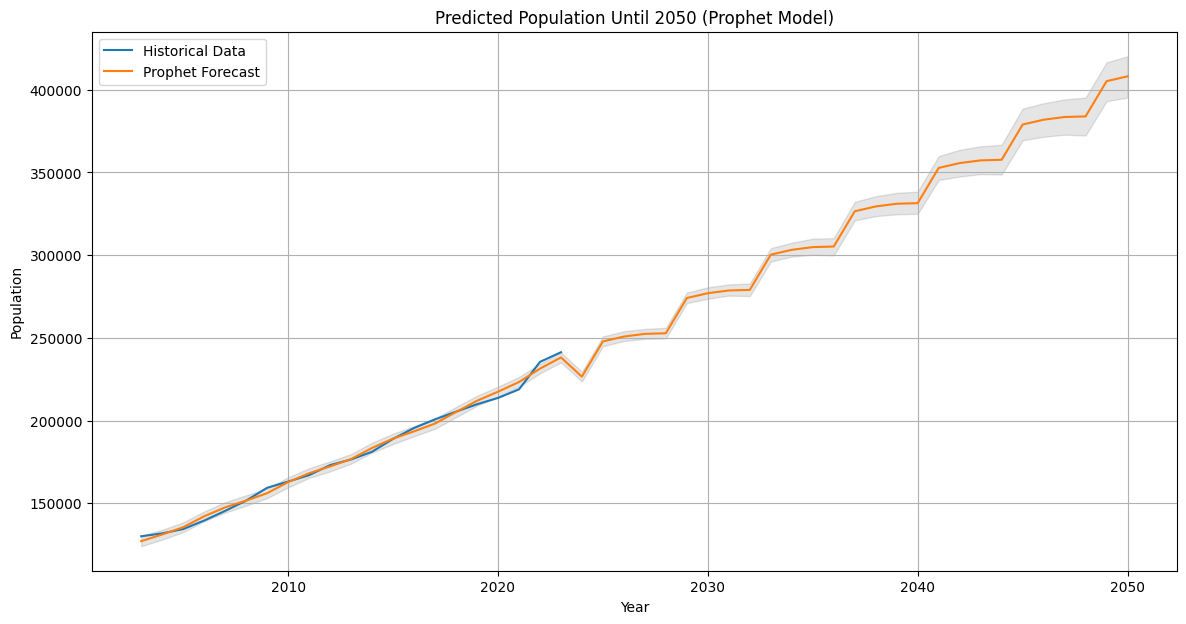

In [11]:
from prophet import Prophet
import matplotlib.pyplot as plt

df_prophet = df.reset_index()
df_prophet = df_prophet.rename(columns={'Year': 'ds', 'District Population': 'y'})


model_prophet = Prophet()
model_prophet.fit(df_prophet)


future = model_prophet.make_future_dataframe(periods=steps_2050, freq='Y')
forecast_prophet = model_prophet.predict(future)

plt.figure(figsize=(14, 7))
plt.plot(df['District Population'], label='Historical Data')
plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label='Prophet Forecast')
plt.fill_between(forecast_prophet['ds'], forecast_prophet['yhat_lower'], forecast_prophet['yhat_upper'], color='k', alpha=0.1)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Predicted Population Until 2050 (Prophet Model)')
plt.legend()
plt.grid(True)
plt.show()


In [12]:

forecast_df_prophet = forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast_df_prophet = forecast_df_prophet.rename(columns={'ds': 'Year', 'yhat': 'Predicted Population', 'yhat_lower': 'Lower Bound', 'yhat_upper': 'Upper Bound'})


forecast_df_prophet = forecast_df_prophet[forecast_df_prophet['Year'].dt.year <= 2050]


forecast_df_prophet['Year'] = forecast_df_prophet['Year'].dt.year
forecast_df_prophet.set_index('Year', inplace=True)


print(forecast_df_prophet.head(30)) 


      Predicted Population    Lower Bound    Upper Bound
Year                                                    
2003         127044.768113  123977.816519  130210.410963
2004         131074.100150  127971.876580  133957.938392
2005         135470.303126  132538.509750  138406.301862
2006         142086.024001  139110.290282  145027.402302
2007         147473.908913  144334.572726  150638.584474
2008         151576.632449  148514.119956  154779.958596
2009         156048.281839  153055.543541  158982.619116
2010         162739.235026  159581.780270  165649.220764
2011         168137.271506  165269.925667  171165.684586
2012         172242.308304  169226.776941  175277.248585
2013         176714.472969  173941.120051  179747.588667
2014         183408.803916  180550.230789  186606.733207
2015         189072.936153  185787.916537  192069.590339
2016         193443.641586  190501.043117  196553.240651
2017         198182.153450  194996.299676  201331.821185
2018         205141.950909  201

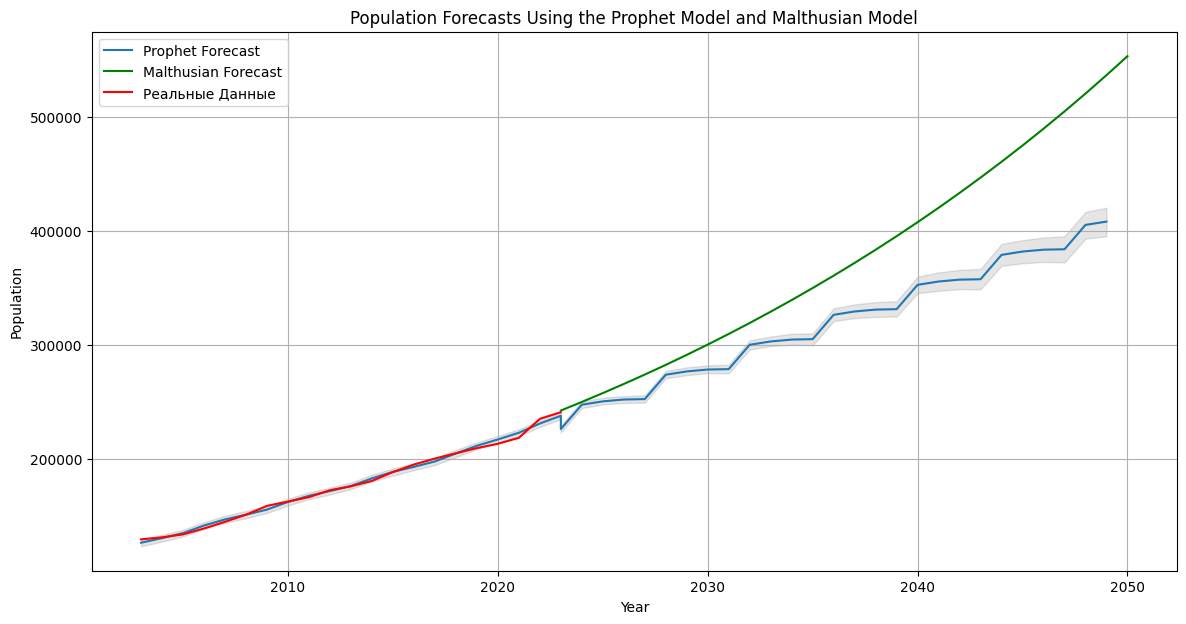

In [13]:
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 7))
plt.plot(forecast_df_prophet.index, forecast_df_prophet['Predicted Population'], label='Prophet Forecast')
plt.fill_between(forecast_df_prophet.index, forecast_df_prophet['Lower Bound'], forecast_df_prophet['Upper Bound'], color='k', alpha=0.1)


plt.plot(forecast_df_2050['Year'], forecast_df_2050['Predicted District Population'], label='Malthusian Forecast', color='green')
plt.plot(df.index.year, df['District Population'], label='Реальные Данные', color='red')


plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Forecasts Using the Prophet Model and Malthusian Model')
plt.legend()
plt.grid(True)
plt.show()
